# **Problem Statement**


In the mobile phone market, companies need to understand how different features of a phone (like RAM, internal memory, etc.) affect its selling price. The goal is to find a relationship between these features and the price range of the phone, indicating whether it is priced high or low. We do not need to predict the exact price of the phone, just the price range it falls into.

# **Github link**
https://github.com/Kashfur/Mobile_Price_Range_Prediction

# **Data Description**

1)Battery_power - Total energy a battery can store

2)Clock_speed - speed at which microprocessor executes instruction

3)Dual_sim - Has dual sim support or not

4)Fc - Front Camera mega pixels

5)Four_g - Has 4G or not

6)Int_memory - Internal Memory in Gigabytes

7)M_dep - Mobile Depth in cm

8)Mobile_wt - Weight of mobile phone

9)N_cores - Number of cores of processor

10)Pc - Primary Camera mega pixels

11)Px_height - Pixel Resolution Height

12)Px_width - Pixel Resolution Width

13)Ram - Random Access Memory in Mega

14)Touch_screen - Has touch screen or not

15)Wifi - Has wifi or not

16)Sc_h - Screen Height of mobile in cm

17)Sc_w - Screen Width of mobile in cm

18)Talk_time - longest time that a single battery charge will last 

19)Three_g - Has 3G or not

20)Wifi - Has wifi or not

21)Price_range - This is the target variable 

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

mobile_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_mobile_price_range.csv')


# **EDA of Dataset**

In [ ]:
#viewing dataset
mobile_data_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#data information
mobile_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#data description
mobile_data_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#checking whether there is null values or not
mobile_data_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
mobile_data_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# **Mobile price ranges**

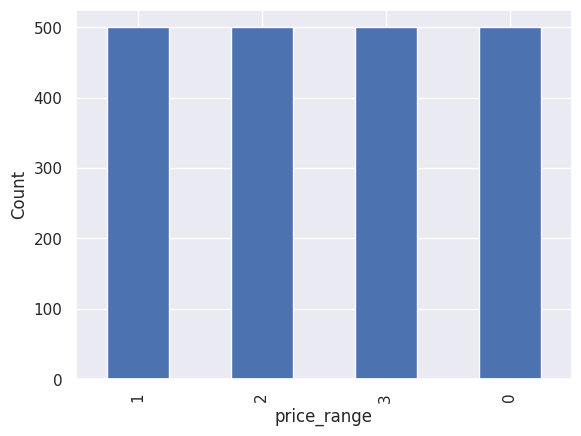

In [ ]:
sns.set()
price_plot=mobile_data_df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

# **price range vs ram**

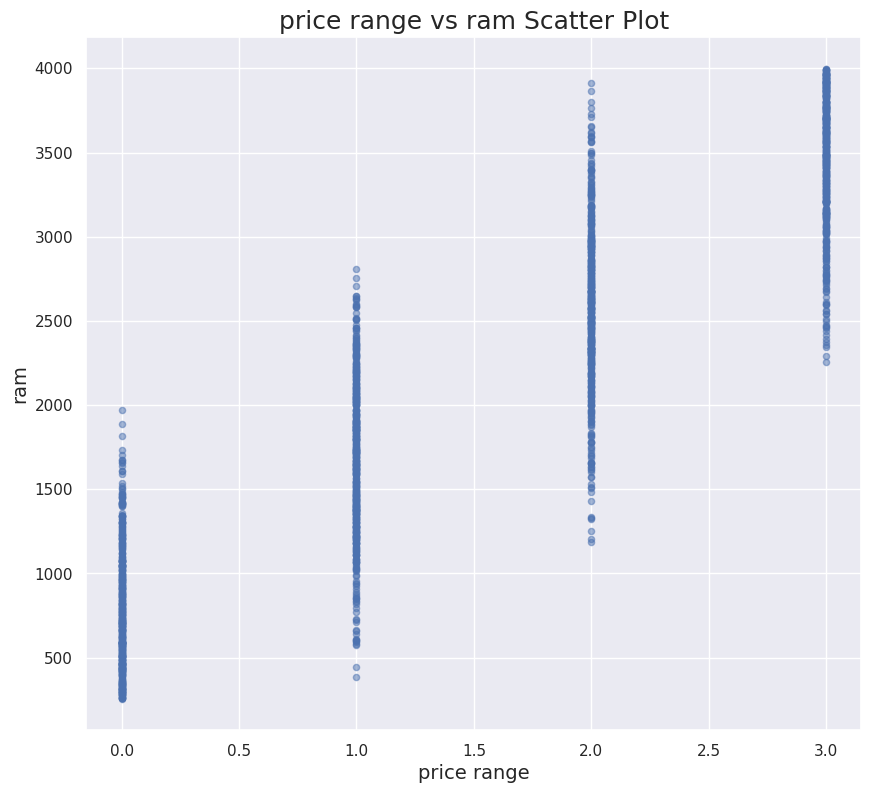

In [ ]:

mobile_data_df.plot(kind='scatter', x='price_range', y='ram',alpha = 0.5,figsize=(10,9))
plt.xlabel('price range',fontdict={'fontsize':14})          
plt.ylabel('ram' ,fontdict={'fontsize':14})
plt.title('price range vs ram Scatter Plot',fontdict={'fontsize':18}) ;       


# **Range of price based on Front camera**

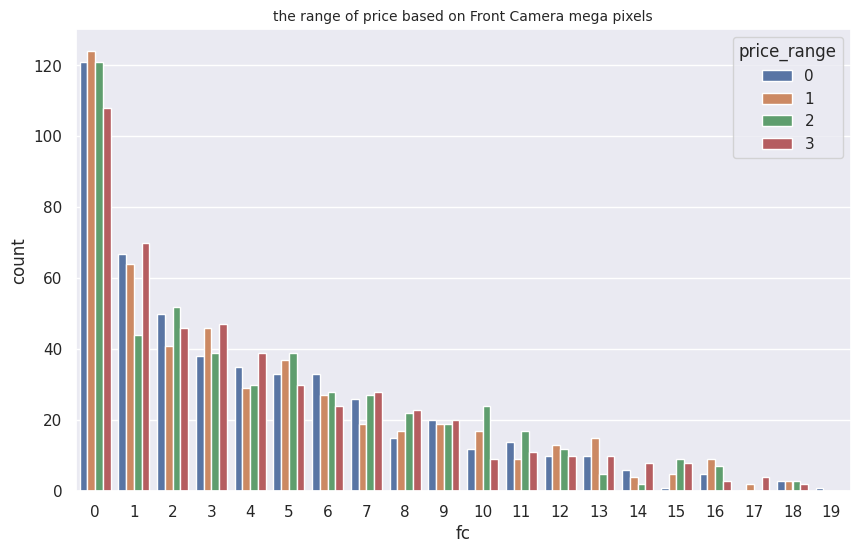

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='fc', data=mobile_data_df, hue= 'price_range').set_title('the range of price based on Front Camera mega pixels',fontsize=10);

# **Range of price based on Primary camera**

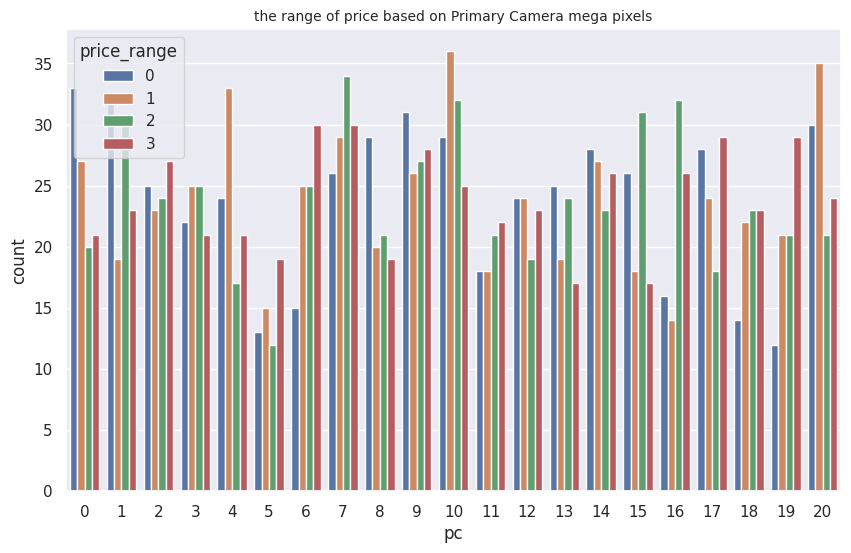

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='pc', data=mobile_data_df, hue= 'price_range').set_title('the range of price based on Primary Camera mega pixels',fontsize=10);

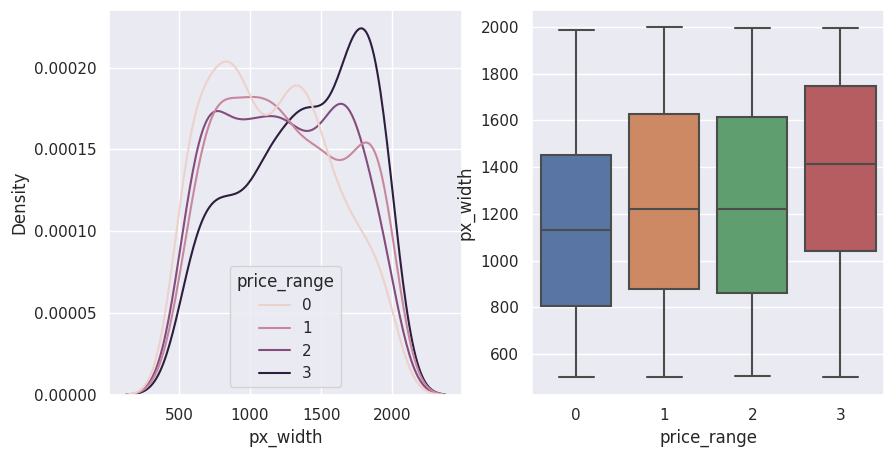

In [ ]:
#pixel_width and price range
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(data=mobile_data_df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=mobile_data_df, x='price_range', y='px_width', ax=axs[1])
plt.show()

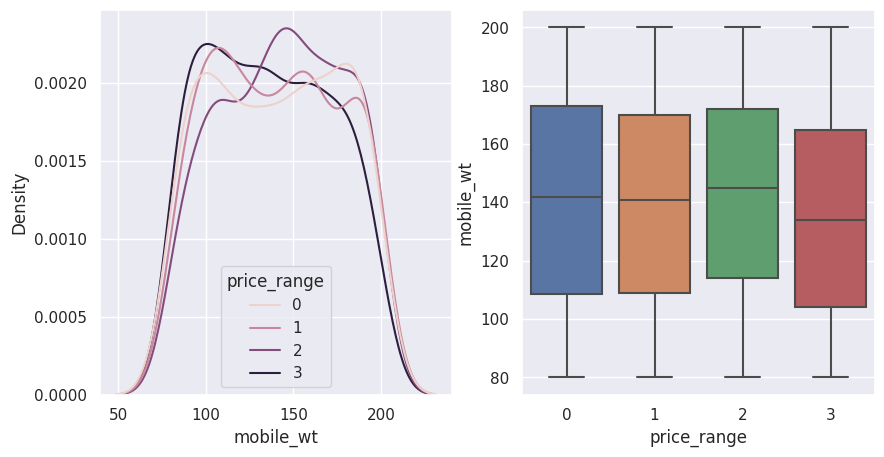

In [ ]:
#mobile weight and price range
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(data=mobile_data_df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=mobile_data_df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

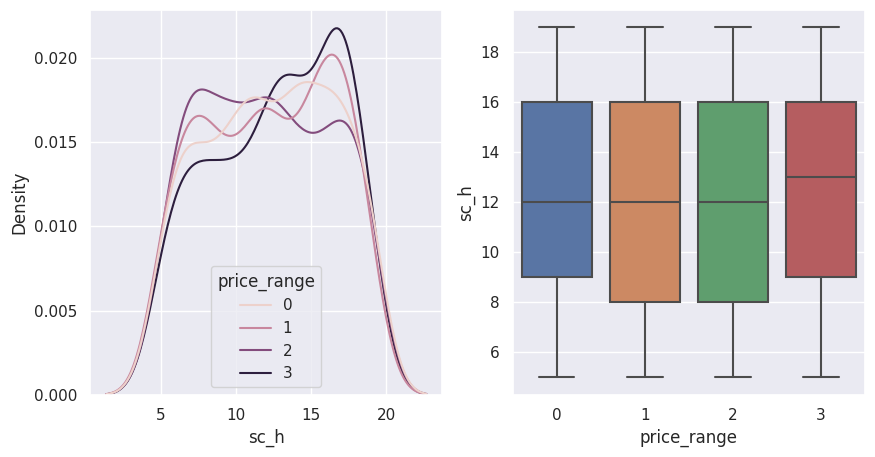

In [ ]:
#screen_size and price range
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(data=mobile_data_df, x='sc_h', hue='price_range', ax=axs[0])
sns.boxplot(data=mobile_data_df, x='price_range', y='sc_h', ax=axs[1])
plt.show()

# **checking Multicollinearity**

<Axes: >

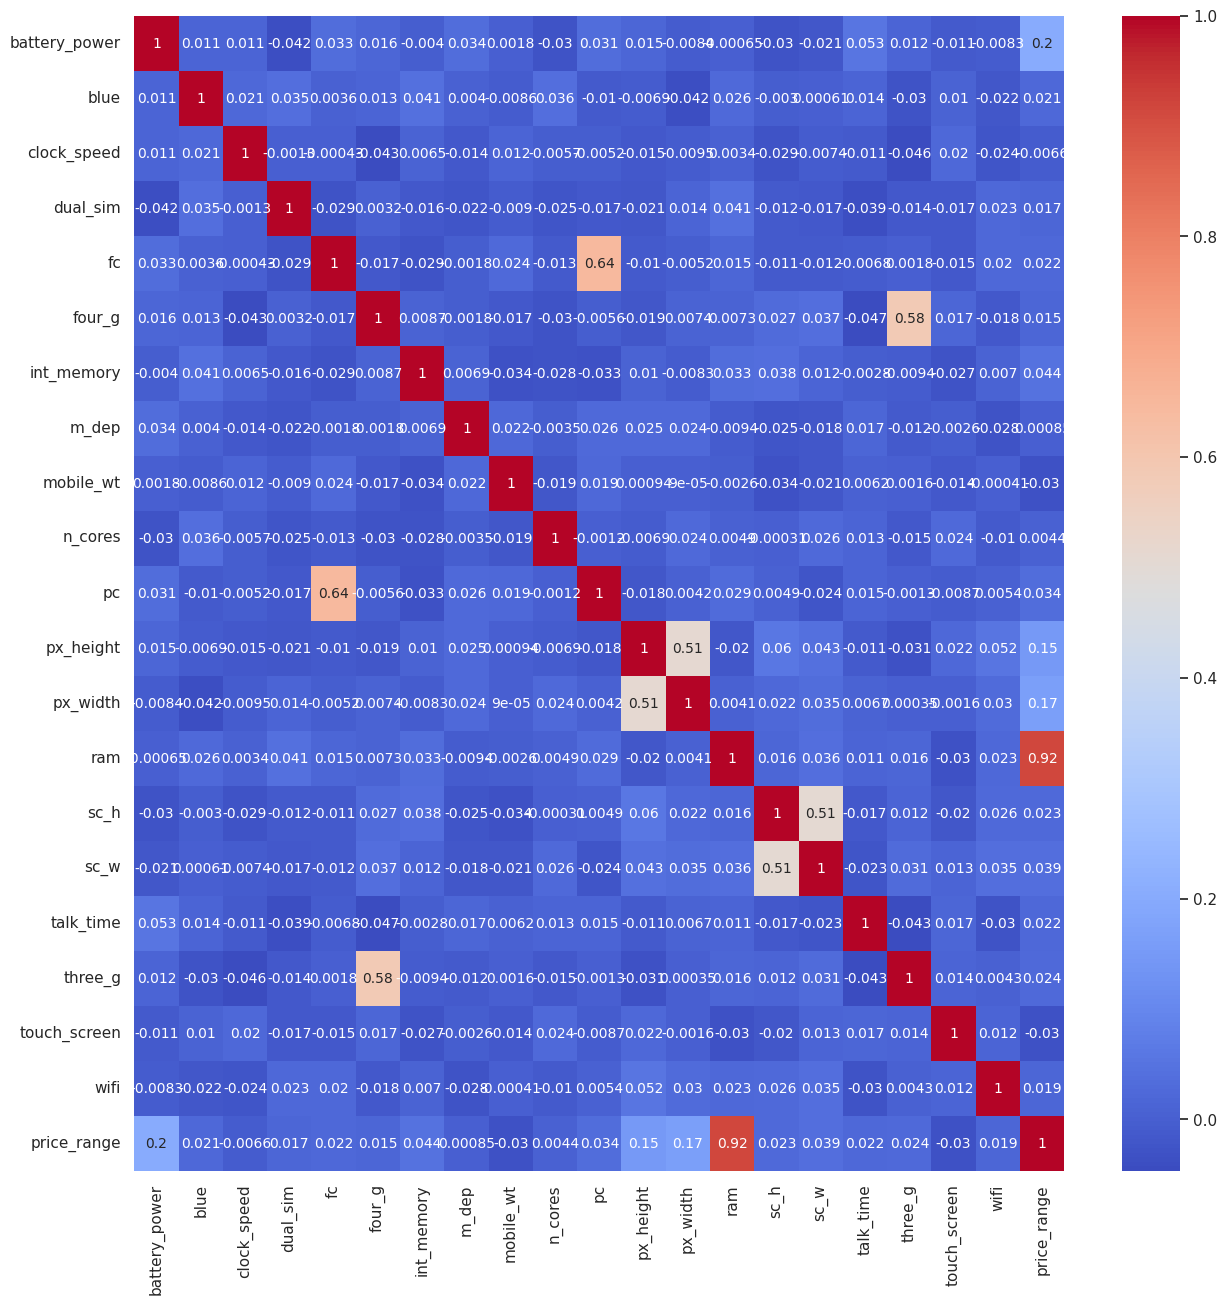

In [ ]:
# Checking for multi-collinearity
correlation = mobile_data_df.corr()
plt.figure(figsize = [15, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True,annot_kws={"size": 10})

<Axes: >

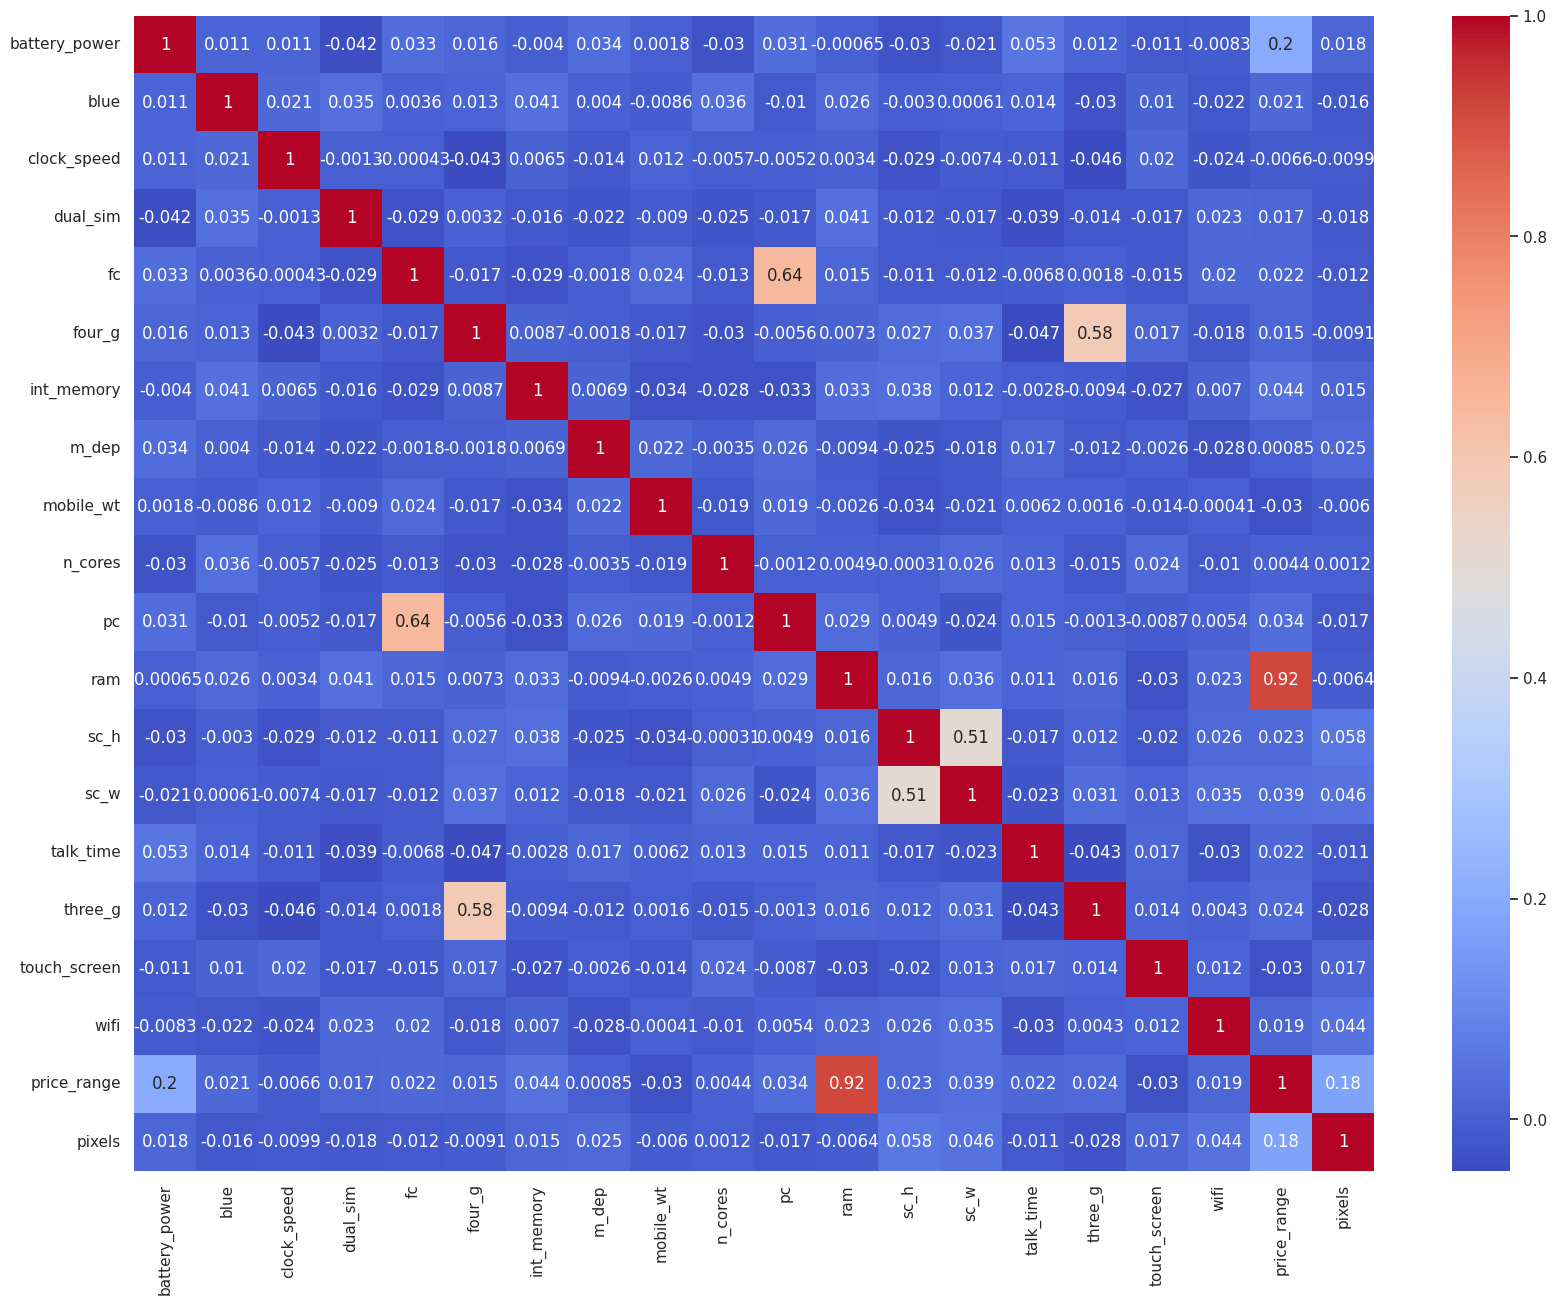

In [ ]:
#  defining new variable for pixels

mobile_data_df['pixels'] = mobile_data_df['px_height']*mobile_data_df['px_width']
# Dropping px_height and px_width

mobile_data_df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = mobile_data_df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

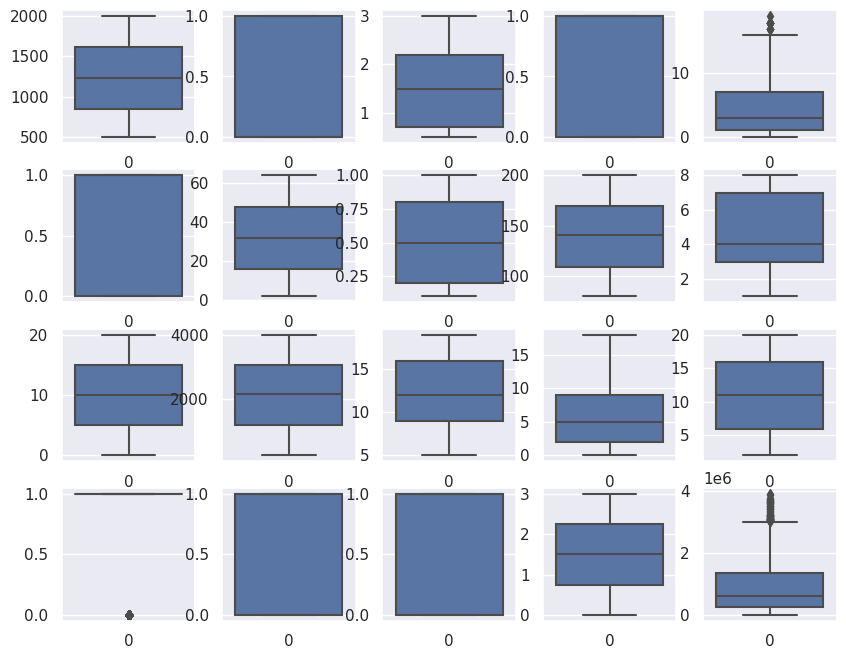

In [ ]:
# looking for outliers using box plot
plt.figure(figsize=(10,10))
for index,item in enumerate([i for i in mobile_data_df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot( mobile_data_df[item])
print("\n")



# **MODELING DATA**

In [ ]:
# Defining X and y

X = mobile_data_df.drop(['price_range'], axis = 1)
y = mobile_data_df['price_range']
     

In [ ]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 1.        ,
        0.00389058],
       [0.34736139, 1.        , 0.        , ..., 1.        , 0.        ,
        0.46294347],
       [0.04141617, 1.        , 0.        , ..., 1.        , 0.        ,
        0.55767817],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 0.        ,
        0.36450449],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        0.05792647],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        0.09370904]])

In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:

# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

# **Logistic Regression**

In [ ]:

# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [ ]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.85      0.88      0.86        88
           2       0.84      0.83      0.83        93
           3       0.93      0.94      0.93       111

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



[[102   3   0   0]
 [  6  77   8   0]
 [  0   8  77   7]
 [  0   0   8 104]]


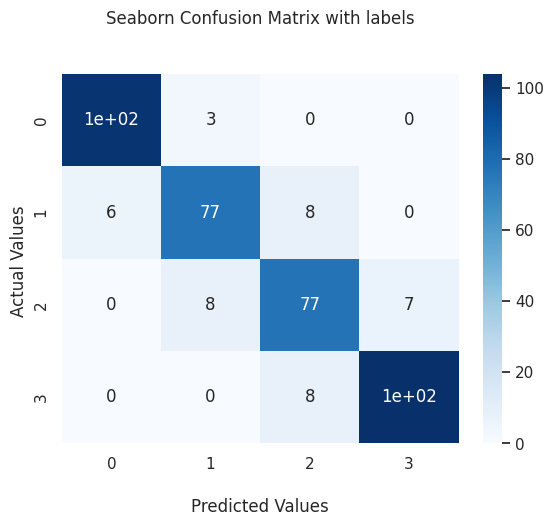

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       403
           1       0.88      0.90      0.89       403
           2       0.86      0.89      0.87       396
           3       0.96      0.93      0.94       398

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



# **Decision tree**

In [ ]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
# taking 100 trees
clsr = RandomForestClassifier(n_estimators=100)
clsr.fit(X_train, y_train)
     
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
     

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)


In [ ]:
accuracy_score(y_test, y_pred_test)

0.82

In [ ]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))
     

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400



In [ ]:
y_pred = clsr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.83      0.82      0.83        91
           2       0.77      0.80      0.79        92
           3       0.93      0.88      0.91       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:

# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.76      0.85      0.80        91
           2       0.78      0.75      0.77        92
           3       0.91      0.92      0.92       112

    accuracy                           0.86       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.86      0.86       400



[[ 94  11   0   0]
 [  4  77  10   0]
 [  0  13  69  10]
 [  0   0   9 103]]


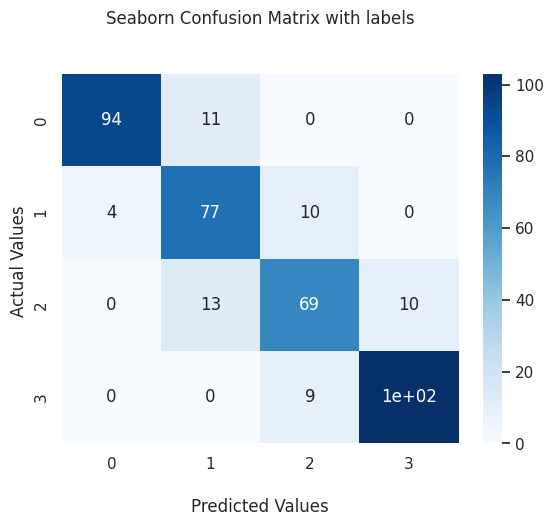

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:

# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       395
           1       0.81      0.88      0.84       409
           2       0.77      0.84      0.80       408
           3       0.96      0.84      0.90       388

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600



# **conclusion**

1)We are able to extract information and come to necessary information using Explotary data analysis.

2)Used two machine learning models - Decision tree and Logistic Regression